# Stanford 40
### Download the data
You can see the zip files if you click the Files tab (looks like a folder symbol on the left of the screen)

### Unzip it

## Read the train and test splits, combine them and make better splits to help training networks easier.

In [9]:
from collections import Counter
from sklearn.model_selection import train_test_split

keep_stanford40 = ["applauding", "climbing", "drinking", "jumping", "pouring_liquid", "riding_a_bike", "riding_a_horse", 
        "running", "shooting_an_arrow", "smoking", "throwing_frisby", "waving_hands"]
with open('Stanford40/ImageSplits/train.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    train_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]

with open('Stanford40/ImageSplits/test.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    test_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]

# Combine the splits and split for keeping more images in the training set than the test set.
all_files = train_files + test_files
all_labels = train_labels + test_labels
train_files, test_files = train_test_split(all_files, test_size=0.1,random_state=0, stratify=all_labels)
train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]
test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (2733):
	['drinking_203.jpg', 'smoking_048.jpg', 'running_099.jpg', 'jumping_186.jpg', 'smoking_205.jpg', 'riding_a_bike_090.jpg', 'climbing_184.jpg', 'throwing_frisby_078.jpg', 'applauding_185.jpg', 'throwing_frisby_131.jpg', 'running_241.jpg', 'riding_a_horse_229.jpg', 'throwing_frisby_009.jpg', 'climbing_126.jpg', 'waving_hands_188.jpg', 'shooting_an_arrow_062.jpg', 'riding_a_horse_191.jpg', 'applauding_087.jpg', 'applauding_074.jpg', 'riding_a_bike_181.jpg', 'running_091.jpg', 'riding_a_bike_188.jpg', 'riding_a_bike_027.jpg', 'throwing_frisby_035.jpg', 'climbing_022.jpg', 'applauding_095.jpg', 'waving_hands_024.jpg', 'running_225.jpg', 'climbing_224.jpg', 'riding_a_bike_108.jpg', 'running_050.jpg', 'jumping_089.jpg', 'pouring_liquid_089.jpg', 'climbing_087.jpg', 'applauding_143.jpg', 'jumping_069.jpg', 'waving_hands_039.jpg', 'smoking_019.jpg', 'drinking_030.jpg', 'running_189.jpg', 'climbing_159.jpg', 'climbing_221.jpg', 'drinking_162.jpg', 'drinking_210.jpg', 'riding_

## Make an aditional training and validation split on the Stanford40 set.


In [10]:
train_files, validation_files, train_labels, validation_labels = train_test_split(train_files, train_labels, test_size=0.1,random_state=0, stratify=train_labels)
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Validation files ({len(validation_files)}):\n\t{validation_files}')
print(f'Validation labels ({len(validation_labels)}):\n\t{validation_labels}\n'\
      f'Validation Distribution:{list(Counter(sorted(validation_labels)).items())}\n')

Train files (2459):
	['riding_a_bike_140.jpg', 'running_196.jpg', 'jumping_005.jpg', 'riding_a_bike_282.jpg', 'climbing_130.jpg', 'running_168.jpg', 'waving_hands_168.jpg', 'riding_a_horse_161.jpg', 'climbing_048.jpg', 'pouring_liquid_053.jpg', 'riding_a_bike_292.jpg', 'running_039.jpg', 'drinking_220.jpg', 'drinking_005.jpg', 'smoking_030.jpg', 'riding_a_bike_286.jpg', 'drinking_025.jpg', 'applauding_215.jpg', 'smoking_117.jpg', 'waving_hands_196.jpg', 'applauding_140.jpg', 'riding_a_horse_292.jpg', 'throwing_frisby_013.jpg', 'smoking_172.jpg', 'applauding_005.jpg', 'climbing_210.jpg', 'pouring_liquid_104.jpg', 'riding_a_bike_128.jpg', 'waving_hands_041.jpg', 'riding_a_bike_083.jpg', 'shooting_an_arrow_048.jpg', 'drinking_034.jpg', 'drinking_223.jpg', 'drinking_100.jpg', 'running_188.jpg', 'pouring_liquid_031.jpg', 'smoking_184.jpg', 'jumping_225.jpg', 'jumping_272.jpg', 'riding_a_horse_069.jpg', 'jumping_273.jpg', 'smoking_178.jpg', 'climbing_253.jpg', 'jumping_185.jpg', 'pouring_liq

## Transforming string labels to Index labels of the classname list.

In [6]:
from sklearn.preprocessing import LabelEncoder
# fit the label encoder:
le_stanford = LabelEncoder()
le_stanford.fit(keep_stanford40)

# convert string labels to indexes for all labels:
train_labels = le_stanford.transform(train_labels)
validation_labels = le_stanford.transform(validation_labels)
test_labels = le_stanford.transform(test_labels)


# print the resulting index labels
#print(train_labels)
#print(validation_labels)
#print(test_labels)

### Visualize a photo from the training files and also print its label

An image with the label - climbing


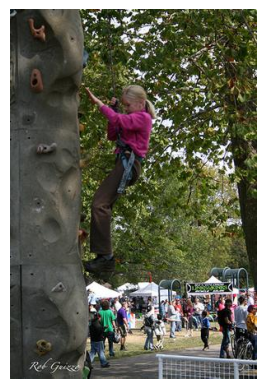

In [11]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

image_no = 4  # change this to a number between [0, 1200] and you can see a different training image
img = cv2.imread(f'Stanford40/JPEGImages/{train_files[image_no]}')
print(f'An image with the label - {train_labels[image_no]}')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Turning the list of image names into a tensorflow dataset with images and labels.

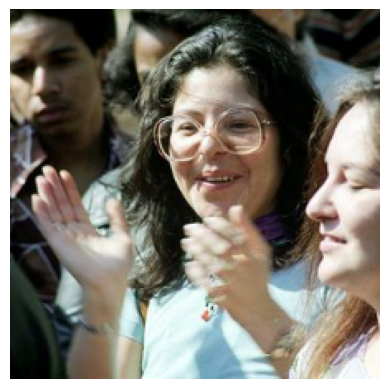

tf.Tensor(b'riding_a_bike', shape=(), dtype=string)


In [13]:
import tensorflow as tf

#add the directory structure to the filenames:
train_path_files = []
for f in train_files:
    train_path_files.append(f'Stanford40/JPEGImages/{f}')
stanford_train = tf.data.Dataset.from_tensor_slices((train_path_files, train_labels))

validation_path_files = []
for f in validation_files:
    validation_path_files.append(f'Stanford40/JPEGImages/{f}')
stanford_validation = tf.data.Dataset.from_tensor_slices((validation_path_files, validation_labels))

test_path_files = []
for f in test_files:
    test_path_files.append(f'Stanford40/JPEGImages/{f}')
stanford_test = tf.data.Dataset.from_tensor_slices((test_path_files, test_labels))

#parse filenames to preprocessed image:
def _parse_function(filename, label):
    image_string = tf.io.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string)
    image_resized = tf.keras.preprocessing.image.smart_resize(image_decoded, [224,224])
    image_resized = image_resized / 255
    return image_resized, label


stanford_train = stanford_train.map(_parse_function)
stanford_validation = stanford_validation.map(_parse_function)
stanford_test = stanford_test.map(_parse_function)

for im, lb in stanford_train.take(1):
    plt.imshow(im.numpy() / 255)
    plt.axis('off')
    plt.show()
    print(lb)

# Human Motion Database 51 (HMDB51)
### Download the dataset

# Split HMD into train and test

In [ ]:
import os
import glob

keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse", 
        "run", "shoot_bow", "smoke", "throw", "wave"]

TRAIN_TAG, TEST_TAG = 1, 2
train_files, test_files = [], []
train_labels, test_labels = [], []
split_pattern_name = f"*test_split1.txt"
split_pattern_path = os.path.join('test_train_splits', split_pattern_name)
annotation_paths = glob.glob(split_pattern_path)
for filepath in annotation_paths:
    class_name = '_'.join(filepath.split('\\')[-1].split('_')[:-2])
    if class_name not in keep_hmdb51:
        continue  # skipping the classes that we won't use.
    with open(filepath) as fid:
        lines = fid.readlines()
    for line in lines:
        video_filename, tag_string = line.split()
        tag = int(tag_string)
        if tag == TRAIN_TAG:
            train_files.append(video_filename)
            train_labels.append(class_name)
        elif tag == TEST_TAG:
            test_files.append(video_filename)
            test_labels.append(class_name)

print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (840):
	['#20_Rhythm_clap_u_nm_np1_fr_goo_0.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_2.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_3.avi', '#20_Rhythm_clap_u_nm_np1_le_goo_4.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_0.avi', 'A_Round_of_Applause_clap_u_cm_np1_fr_med_1.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_0.avi', 'Applauding_Abby_clap_u_nm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_0.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_1.avi', 'Baby_Bob_kann_klatschen_!_clap_u_cm_np1_fr_med_2.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_0.avi', 'Boom_Snap_Clap_clap_u_nm_np1_fr_med_1.avi', 'Boom__Snap__Clap!_(Challenge)_clap_u_nm_np1_fr_med_1.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_0.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Budam_-_Clap_Hands_clap_u_nm_np1_fr_med_2.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_0.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_1.avi', 'Clap_Hands_clap_u_nm_np1_fr_med_2.

## And additional split of the training data into a train and validation set


In [ ]:
train_files, validation_files, train_labels, validation_labels = train_test_split(train_files, train_labels, test_size=0.1,random_state=0, stratify=train_labels)
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Validation files ({len(validation_files)}):\n\t{validation_files}')
print(f'Validation labels ({len(validation_labels)}):\n\t{validation_labels}\n'\
      f'Validation Distribution:{list(Counter(sorted(validation_labels)).items())}\n')

Train files (756):
	['Documentario_Le_Parkour_Londrina_jump_f_nm_np1_ri_bad_2.avi', 'boom_snap_clap_(challenge)_HARDCORE_VERSION!_clap_u_nm_np1_fr_bad_1.avi', 'EVOLUTION_wave_u_nm_np1_le_med_3.avi', 'megan_roof_climbing_climb_f_cm_np1_ri_goo_0.avi', 'Maya_beim_Winken_wave_f_cm_np1_fr_med_0.avi', 'Become_a_Professional_Bartender_pour_u_cm_np1_fr_med_0.avi', 'TrumanShow_run_f_nm_np1_ba_med_19.avi', 'Tour_de_France_2003_-_Armstrong_attacks_Ullrich_after_Fall_ride_bike_f_cm_np2_fr_med_1.avi', 'Compilationknifethrowing_throw_u_nm_np1_ba_med_2.avi', 'NotAnotherTeenMovieslowclap_clap_u_cm_np5_fr_med_3.avi', 'Radfahren_um_die_Aggertalsperre_06_09_2009_ride_bike_f_cm_np2_ri_med_6.avi', 'MUSE_Wave_Goodbye_in_Wembley_wave_u_cm_np3_fr_med_1.avi', 'smoking_1_smoke_h_cm_np1_ri_med_1.avi', 'Veoh_Alpha_Dog_1_throw_u_nm_np1_ri_med_25.avi', '#20_Rhythm_clap_u_nm_np1_fr_goo_1.avi', 'slowclap_clap_u_nm_np1_fr_goo_0.avi', 'Mylifehorseriding_ride_horse_f_cm_np1_ri_med_1.avi', '#437_How_To_Ride_A_Bike_ride_b

## Transforming the string labels to index labels of the classname list.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# fit the label encoder:
le_hmdb51 = LabelEncoder()
le_hmdb51.fit(keep_hmdb51)

# convert string labels to indexes for all labels:
train_labels = le_hmdb51.transform(train_labels)
validation_labels = le_hmdb51.transform(validation_labels)
test_labels = le_hmdb51.transform(test_labels)


# print the resulting index labels
#print(train_labels)
#print(validation_labels)
#print(test_labels)

[ 3  0 11  1 11  4  7  5 10  0  5 11  9 10  0  0  6  5  2  7  9  3 10  7
  7  6  1 10 11  5  1  8  2  8  5  5  6  0  4  3  4  5  6  3  7  2  3  2
 10  2 11 11 11  4  8  6  8  2  4  4  0  6  2  4  7  8  9  6  7  2  0  4
  6  7  2  5 11  2  2  4  3  3  3 11  3  7  6  4 11  7  2  9  5  9  7  3
  7 11  4  7  0  5  5  4  8  9 11  3 11 11 11  0  6  5  3  1  3  2  1  5
  6  6  0  9 10  9  1  9  7  7  1  8  9  3 10  7  9  0  9  7  2  9  0  8
  2  6  7  1  7  7  6  4  1 10 10  5  0 10 11 11  7  0  5  9  9  4  5  1
  1  2  3 11  4  8  6  1  3  3 11 11  3  6  9  4  4  4 11  6  2  3  1  0
  5  7  0  0  4  0  8 10  6  8  5  1 11  5  2  7  2  7  9 10 11  8  0  5
 11 10 11  5  6  7  2  3  5  5 10  6  1  0  9  7  4  0 10  1  2  1 10  5
  2 10  8  2  3  8  7  2  1  5  1  1 10  0  1  0 10  1  2  1  4 10  2  8
  8  0 11  8  1  6  0 11 11  9  5  7  6  3  8  3  0 11  8  8  7  4  7  3
  3  3 11  1  1 11 10  6  5 11 10  9 11  6  6  6  6  6  0  9 10  5  5  4
  5  2  5  0  4  5 10  2  0  2 11  4  9  2 10  4 10